<a href="https://colab.research.google.com/github/2303a52332/EX-AI-2303A52332_practicall/blob/main/LAB_EXAM__2303A52332.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing pandas library
import pandas as pd

# Step 1: Create a dictionary with sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [24, 27, 22, 32, 29],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Salary': [55000, 64000, 48000, 72000, 61000]
}

# Step 2: Convert dictionary to a DataFrame
df = pd.DataFrame(data)

# Step 3: Display the dataset
print("Original Dataset:")
print(df)

# Step 4: Basic dataset operations
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Step 5: Add a new column
df['Experience (Years)'] = [1, 3, 2, 5, 4]
print("\nDataset after adding new column:")
print(df)

# Step 6: Filter data (e.g., people with salary > 60000)
filtered_df = df[df['Salary'] > 60000]
print("\nFiltered Dataset (Salary > 60000):")
print(filtered_df)

# Step 7: Save dataset to a CSV file
df.to_csv('/content/archive(5).zip', index=False)
print("\nDataset saved to 'framed_dataset.csv'")

Original Dataset:
      Name  Age         City  Salary
0    Alice   24     New York   55000
1      Bob   27  Los Angeles   64000
2  Charlie   22      Chicago   48000
3    David   32      Houston   72000
4      Eva   29      Phoenix   61000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
 3   Salary  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes
None

Summary Statistics:
             Age        Salary
count   5.000000      5.000000
mean   26.800000  60000.000000
std     3.962323   9082.951062
min    22.000000  48000.000000
25%    24.000000  55000.000000
50%    27.000000  61000.000000
75%    29.000000  64000.000000
max    32.000000  72000.000000

Dataset after adding new column:
      Name  Age         City  Salar

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame from the previous cell
# Replace 'your_features' with the list of feature column names
# Replace 'your_target' with the name of your target column
X = df[['Age', 'Salary', 'Experience (Years)']] # Example features
y = df['City'] # Example target - you'll need to define what your target variable is

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split into training and testing sets:
X_train shape: (4, 3)
X_test shape: (1, 3)
y_train shape: (4,)
y_test shape: (1,)


MACHINE LEARNING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=3), # Set n_neighbors to a value less than or equal to the number of training samples
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    # Handle cases where classification_report might raise errors due to small sample size or lack of predictions for certain classes
    try:
        report = classification_report(y_test, y_pred, output_dict=True)
        f1 = report['weighted avg']['f1-score']
    except ValueError:
        f1 = float('nan') # Assign NaN if classification_report fails

    results[name] = {'Accuracy': acc, 'F1-score': f1}

display(pd.DataFrame(results).T)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

,Accuracy,F1-score
Logistic Regression,0.0,0.0
Decision Tree,0.0,0.0
Random Forest,0.0,0.0
SVM,0.0,0.0
KNN,0.0,0.0
Gradient Boosting,0.0,0.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Accuracy'}, axis=1)
              .sort_values('Accuracy', ascending=True))
  xs = counted['Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Accuracy', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['F1-score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'F1-score'}, axis=1)
              .sort_values('F1-score', ascending=True))
  xs = counted['F1-score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('F1-score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('F1-score')
_ = plt.ylabel('count()')

XGBOOST

In [ ]:
!pip install imbalanced-learn xgboost shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b8e0cdbaafe16d301f718a02c0826d7835bf9b03ab9164de7c025020fa2272c2
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


Cell 1 — Imports & helpers

In [ ]:
# Cell 1 - Imports and helpers
import os, warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from collections import Counter

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Imbalance
from imblearn.over_sampling import SMOTE

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

def print_metrics(y_true, y_pred, y_proba=None, average='weighted'):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average, zero_division=0)
    rec = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)
    roc = None
    if y_proba is not None:
        try:
            if len(np.unique(y_true)) == 2:
                roc = roc_auc_score(y_true, y_proba)
            else:
                roc = roc_auc_score(y_true, y_proba, multi_class='ovo', average=average)
        except Exception:
            roc = None
    print(f"Accuracy: {acc:.4f}, Precision ({average}): {prec:.4f}, Recall ({average}): {rec:.4f}, F1 ({average}): {f1:.4f}, ROC-AUC: {roc if roc is not None else 'N/A'}")
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0))

Cell 2 — Load dataset & quick EDA

In [ ]:
# Cell 2 - Load the dataset
DATA_PATH = "/content/archive(5).zip"



df = pd.read_csv(DATA_PATH)
print("Loaded dataset:", DATA_PATH)
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)

# Quick missing value check
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(20))

Loaded dataset: /content/archive(5).zip
Shape: (5, 5)


,Name,Age,City,Salary,Experience (Years)
0,Alice,24,New York,55000,1
1,Bob,27,Los Angeles,64000,3
2,Charlie,22,Chicago,48000,2
3,David,32,Houston,72000,5
4,Eva,29,Phoenix,61000,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                5 non-null      object
 1   Age                 5 non-null      int64 
 2   City                5 non-null      object
 3   Salary              5 non-null      int64 
 4   Experience (Years)  5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 332.0+ bytes


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5,5,Alice,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5.0,NaN,NaN,NaN,26.8,3.962323,22.0,24.0,27.0,29.0,32.0
City,5,5,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,5.0,NaN,NaN,NaN,60000.0,9082.951062,48000.0,55000.0,61000.0,64000.0,72000.0
Experience (Years),5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0



Missing values per column:
Name                  0
Age                   0
City                  0
Salary                0
Experience (Years)    0
dtype: int64
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Cell 3 — Identify target & features, basic cleaning

In [ ]:
# Cell 3 - target detection and simple cleaning
# If you know the target column, set TARGET_COL; otherwise it'll try to guess.
TARGET_COL = None

if TARGET_COL is None:

    candidates = [c for c in df.columns if c.lower() in ('target','label','class','crop','category','yield')]
    TARGET_COL = candidates[0] if candidates else df.columns[-1]
    print("Using target column:", TARGET_COL)

# Separate X and y
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL].copy()

# Identify numeric and categorical
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric cols:", len(num_cols))
print("Categorical cols:", len(cat_cols), cat_cols[:10])

Using target column: Experience (Years)
Numeric cols: 2
Categorical cols: 2 ['Name', 'City']


Cell 4 — Handle missing values, encode categorical, scale numeric


In [ ]:
# Cell 4 - Impute, encode, scale
# Impute numeric with mean, categorical with most frequent
num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
    # Simple label-encoding for categories
    for c in cat_cols:
        X[c] = LabelEncoder().fit_transform(X[c].astype(str))

# Scale numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Encode target if needed
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)
print("Classes:", list(le_target.classes_))

Classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]


Cell 5 — Train/test split and SMOTE if imbalanced

In [ ]:
# Cell 5 - train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=RANDOM_STATE) # Removed stratify=y_enc
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:", Counter(y_train))

# Apply SMOTE if highly imbalanced
ratio = min(Counter(y_train).values()) / max(Counter(y_train).values())
if ratio < 0.5:
    print("Applying SMOTE to balance classes (train only)...")
    sm = SMOTE(random_state=RANDOM_STATE)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    print("After SMOTE distribution:", Counter(y_train))
else:
    print("No SMOTE needed (ratio >= 0.5).")

Train shape: (4, 4) Test shape: (1, 4)
Train class distribution: Counter({np.int64(3): 1, np.int64(1): 1, np.int64(0): 1, np.int64(4): 1})
No SMOTE needed (ratio >= 0.5).


Cell 6 — ML models training & evaluation (Logistic, Tree, RF, SVM, KNN, XGBoost, GB)

In [ ]:
# Cell 6 - Train and evaluate ML models
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, random_state=RANDOM_STATE),
    "DecisionTree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1),
    "SVM": SVC(probability=True, random_state=RANDOM_STATE),
    "KNN": KNeighborsClassifier(n_neighbors=3), # Set n_neighbors to a value less than or equal to the number of training samples
    "GradientBoosting": GradientBoostingClassifier(random_state=RANDOM_STATE),

}

results = []
for name, model in models.items():
    print("----", name, "----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = None
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test)
            # For binary return the probability of class 1 else leave full matrix
            if y_proba.shape[1] == 2:
                y_proba_for_roc = y_proba[:,1]
            else:
                y_proba_for_roc = y_proba
        except Exception:
            y_proba_for_roc = None
    else:
        y_proba_for_roc = None

    # evaluation (multi-class handled by average='weighted')
    print_metrics(y_test, y_pred, y_proba_for_roc, average='weighted')
    # store summary
    results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred, average='weighted')
    })
    print("\n")
results_df = pd.DataFrame(results).set_index('model').sort_values(by='f1', ascending=False)
display(results_df)

---- LogisticRegression ----
Accuracy: 0.0000, Precision (weighted): 0.0000, Recall (weighted): 0.0000, F1 (weighted): 0.0000, ROC-AUC: N/A
Confusion matrix:
[[0 0]
 [1 0]]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



---- DecisionTree ----
Accuracy: 0.0000, Precision (weighted): 0.0000, Recall (weighted): 0.0000, F1 (weighted): 0.0000, ROC-AUC: N/A
Confusion matrix:
[[0 0]
 [1 0]]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg 

,accuracy,f1
model,,
LogisticRegression,0.0,0.0
DecisionTree,0.0,0.0
RandomForest,0.0,0.0
SVM,0.0,0.0
KNN,0.0,0.0
GradientBoosting,0.0,0.0


DEEP LEARNING

Cell 7 — Confusion matrix and ROC (binary case)

Best model by F1: LogisticRegression
Confusion matrix for best model:


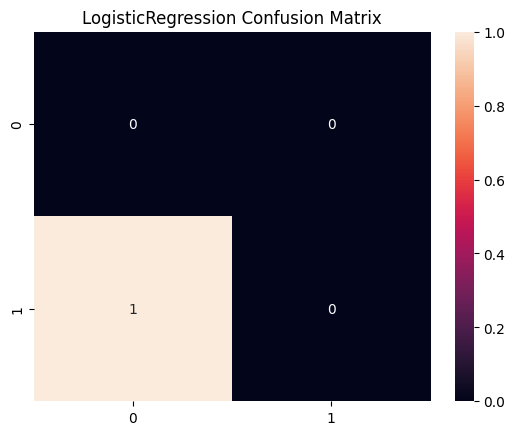

Multiclass problem - ROC-AUC per class would require one-vs-rest; skipped here.


In [ ]:
# Cell 7 - Confusion matrix for best model and ROC (if binary)
best_model_name = results_df.index[0]
best_model = models[best_model_name]
print("Best model by F1:", best_model_name)

y_pred_best = best_model.predict(X_test)
print("Confusion matrix for best model:")
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d')
plt.title(f"{best_model_name} Confusion Matrix")
plt.show()

# ROC if binary
if len(np.unique(y_enc)) == 2:
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)[:,1]
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
        plt.plot([0,1],[0,1],'--', color='gray')
        plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend()
        plt.show()
    else:
        print("Best model doesn't provide predict_proba; cannot plot ROC.")
else:
    print("Multiclass problem - ROC-AUC per class would require one-vs-rest; skipped here.")